# Salary Range Prediction

to develop a predictive model for estimating salary ranges for job listings as part of their ongoing efforts to revolutionize talent management. This project aims to leverage historical job data provided by our partners to predict both minimum and maximum salary ranges accurately for a given posting.

### Project Benefits:

- Enhanced Recruitment Process: By accurately predicting salary ranges, recruiters can better align job postings with market standards, attracting top-tier talent while optimizing hiring costs.
- Improved Candidate Experience: Providing transparent salary expectations upfront can significantly enhance candidate engagement and satisfaction, leading to higher acceptance rates.
- Strategic Decision-Making: Access to reliable salary forecasts empowers HR professionals and organizational leaders to make informed decisions regarding budget allocation and resource planning.

### Data Dictionary: ###
- Job ID: A unique identifier assigned to each job posting. It helps track and manage job listings.
- Agency: Agency responsible for managing city employees and providing various support services to all city agencies.
- Posting Type: Indicates whether the job posting is for a new position, a transfer, or a promotional opportunity.
- Of Positions: The number of available positions for the job.
- Business Title: The official job title used by the city.
- Civil Service Title: The title classification based on civil service regulations.
- Title Classification: Further categorization of the job title.
- Title Code No: A unique code associated with the job title.
- Level: The level or rank of the position.
- Job Category: The broad category or field to which the job belongs (e.g., administration, finance, law enforcement).
- Full-Time/Part-Time Indicator: Specifies whether the position is full-time or part-time.
- Career Level: Indicates the career stage (e.g., entry-level, mid-level, senior).
- Salary Range From: The minimum salary for the position.
- Salary Range To: The maximum salary for the position.
- Salary Frequency: How often the salary is paid (e.g., annually, monthly).
- Work Location: The physical location where the job is based.
- Division/Work Unit: The specific department or unit within the agency.
- Job Description: A summary of the responsibilities and duties associated with the job.
- Minimum Qual Requirements: The qualifications or criteria applicants must meet to be eligible for the position.
- Preferred Skills: Any additional skills or qualifications that are desirable but not mandatory.
- Additional Information: Any other relevant details about the job.
- To Apply: Instructions on how to apply for the position.
- Hours/Shift: Information about work hours or shifts.
- Recruitment Contact: Contact details for inquiries related to recruitment.
- Residency Requirement: Specifies whether applicants must be residents of New York City.
- Posting Date: The date when the job was posted.
- Post Until: The deadline for submitting applications.
- Posting Updated: The date when the job posting was last updated.
- Process Date: The date when the data was processed or recorded.

### Import Necessary libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
data = pd.read_csv('D:\Salary-Range-Prediction\dataset\Jobs_NYC_Postings.csv')
df = data.copy()
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [3]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [4]:
df.shape

(5120, 30)

In [5]:
df.size

153600

In [6]:
df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


In [7]:
temp = pd.DataFrame(index = df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
Job ID,int64,0,2626
Agency,object,0,59
Posting Type,object,0,2
# Of Positions,int64,0,35
Business Title,object,0,1781
Civil Service Title,object,0,365
Title Classification,object,0,5
Title Code No,object,0,388
Level,object,0,18
Job Category,object,0,183


In [8]:
df.drop(['Job ID','Job Description','Recruitment Contact','Work Location 1','To Apply','Additional Information','Post Until'], axis = 1, inplace = True)

In [9]:
df.head()

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Salary Frequency,Work Location,Division/Work Unit,Minimum Qual Requirements,Preferred Skills,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date
0,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,F,...,Annual,42-09 28th Street,"Maternal, Infant, & Repr. Hlth","1. For Assignment Level I (only physical, bio...",Experience in quantitative research methods an...,NaN,New York City residency is generally required ...,01/23/2024,01/23/2024,03/04/2024
1,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",F,...,Annual,30-30 Thomson Ave L I City Qns,Pub Bldgs/Transportation,1. A baccalaureate degree from an accredited c...,Candidates must have excellent management skil...,35 Hours,New York City Residency is not required for th...,10/03/2023,11/29/2023,03/04/2024
2,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",F,...,Annual,30-30 Thomson Ave L I City Qns,PUB BLDGS/CPD/Library/Brooklyn,1. A baccalaureate degree from an accredited c...,Candidates should have at least six years of e...,NaN,New York City Residency is not required for th...,02/01/2024,02/01/2024,03/04/2024
3,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",F,...,Annual,55 Water St Ny Ny,Bridge Repair/352 Kent St,1. A baccalaureate degree from an accredited c...,Familiar with and knowledge of Procurement sys...,9:00am â 5:00pm,New York City residency is generally required ...,04/04/2023,04/04/2023,03/04/2024
4,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,F,...,Annual,42-09 28th Street,Dis-Div. Mgmt. & Sys Coord,"1. For Assignment Level I (only physical, bio...",At least five yearsâ work experience in the ...,NaN,New York City residency is generally required ...,02/06/2024,02/21/2024,03/04/2024


In [10]:
df[['Hours/Shift', 'Salary Range From', 'Salary Range To', 'Salary Frequency']].head(10)


,Hours/Shift,Salary Range From,Salary Range To,Salary Frequency
0,NaN,82506.0000,94882.0,Annual
1,35 Hours,58682.0000,134570.0,Annual
2,NaN,58682.0000,91405.0,Annual
3,9:00am â 5:00pm,50972.0000,82730.0,Annual
4,NaN,92301.0000,106146.0,Annual
5,NaN,140000.0000,160000.0,Annual
6,NaN,56313.0000,64760.0,Annual
7,NaN,48170.0000,48170.0,Annual
8,NaN,22.9267,28.0,Hourly
9,Normal Business Hours,93288.0000,107281.0,Annual


In [11]:
df['Hours/Shift'].value_counts()

Hours/Shift
35 Hours                                                                                                                                                                      299
35 hours per week/day                                                                                                                                                         127
35hrs                                                                                                                                                                          77
35 hours per week                                                                                                                                                              66
35 hours                                                                                                                                                                       46
                                                                                                  

- Normlize the Hours/Shift Columns

In [12]:
# Function to standardize "35 Hours" directly in the same column
def normalize_35_hours(shift):
    if pd.isna(shift):
        return None  # Keep NaN values as is
    
    # Check if "35" and "hour" are present in any form
    if re.search(r'\b35\b', shift, re.IGNORECASE) and re.search(r'\bhour|hrs|hr\b', shift, re.IGNORECASE):
        return "35 Hours"
    
    return None  # Remove other values

# Apply function directly to 'Hours/Shift' column
df['Hours/Shift'] = df['Hours/Shift'].apply(normalize_35_hours)

# Display value counts after normalization
print(df['Hours/Shift'].value_counts())

Hours/Shift
35 Hours    910
Name: count, dtype: int64


In [13]:
df[['Hours/Shift', 'Salary Range From', 'Salary Range To', 'Salary Frequency']].head(10)

,Hours/Shift,Salary Range From,Salary Range To,Salary Frequency
0,None,82506.0000,94882.0,Annual
1,35 Hours,58682.0000,134570.0,Annual
2,None,58682.0000,91405.0,Annual
3,None,50972.0000,82730.0,Annual
4,None,92301.0000,106146.0,Annual
5,None,140000.0000,160000.0,Annual
6,None,56313.0000,64760.0,Annual
7,None,48170.0000,48170.0,Annual
8,None,22.9267,28.0,Hourly
9,None,93288.0000,107281.0,Annual


In [14]:
df['Salary Frequency'].value_counts()

Salary Frequency
Annual    4686
Hourly     384
Daily       50
Name: count, dtype: int64

In [15]:
# Condition where Salary Frequency is 'Annual'
annual_salary_condition = df['Salary Frequency'].str.lower() == 'annual'

# Update 'Hours/Shift' to 'Shift' where the condition is met
df.loc[annual_salary_condition, 'Hours/Shift'] = "Shift"

# Display updated rows
print(df[['Hours/Shift', 'Salary Frequency']].head(10))

  Hours/Shift Salary Frequency
0       Shift           Annual
1       Shift           Annual
2       Shift           Annual
3       Shift           Annual
4       Shift           Annual
5       Shift           Annual
6       Shift           Annual
7       Shift           Annual
8        None           Hourly
9       Shift           Annual


In [16]:
# Condition: Salary Frequency is 'Hourly' & Hours/Shift is NaN
hourly_condition = (df['Salary Frequency'].str.lower() == 'hourly') & (df['Hours/Shift'].isna())

# Update 'Hours/Shift' to '35 Hours' where the condition is met
df.loc[hourly_condition, 'Hours/Shift'] = "35 Hours"

# Display updated rows
print(df[['Hours/Shift', 'Salary Frequency']].head(10))

  Hours/Shift Salary Frequency
0       Shift           Annual
1       Shift           Annual
2       Shift           Annual
3       Shift           Annual
4       Shift           Annual
5       Shift           Annual
6       Shift           Annual
7       Shift           Annual
8    35 Hours           Hourly
9       Shift           Annual


In [17]:
# Condition: If 'Salary Frequency' is 'Daily' & 'Hours/Shift' is NaN or None
daily_condition = (df['Salary Frequency'].str.lower() == 'daily') & (df['Hours/Shift'].isna())

# Replace NaN in 'Hours/Shift' with 'Daily' where condition is met
df.loc[daily_condition, 'Hours/Shift'] = "Daily"

# Display updated rows to verify changes
print(df[['Hours/Shift', 'Salary Frequency']].head(20))

   Hours/Shift Salary Frequency
0        Shift           Annual
1        Shift           Annual
2        Shift           Annual
3        Shift           Annual
4        Shift           Annual
5        Shift           Annual
6        Shift           Annual
7        Shift           Annual
8     35 Hours           Hourly
9        Shift           Annual
10       Daily            Daily
11       Shift           Annual
12    35 Hours           Hourly
13       Shift           Annual
14       Shift           Annual
15    35 Hours           Hourly
16       Shift           Annual
17       Shift           Annual
18       Shift           Annual
19    35 Hours           Hourly


In [18]:
df[['Hours/Shift', 'Salary Range From', 'Salary Range To', 'Salary Frequency']].head(20)

,Hours/Shift,Salary Range From,Salary Range To,Salary Frequency
0,Shift,82506.0000,94882.00,Annual
1,Shift,58682.0000,134570.00,Annual
2,Shift,58682.0000,91405.00,Annual
3,Shift,50972.0000,82730.00,Annual
4,Shift,92301.0000,106146.00,Annual
5,Shift,140000.0000,160000.00,Annual
6,Shift,56313.0000,64760.00,Annual
7,Shift,48170.0000,48170.00,Annual
8,35 Hours,22.9267,28.00,Hourly
9,Shift,93288.0000,107281.00,Annual


In [19]:
df['Hours/Shift'].value_counts()

Hours/Shift
Shift       4686
35 Hours     385
Daily         49
Name: count, dtype: int64

In [20]:
df[['Hours/Shift', 'Salary Range From', 'Salary Range To', 'Salary Frequency']].head(20)

,Hours/Shift,Salary Range From,Salary Range To,Salary Frequency
0,Shift,82506.0000,94882.00,Annual
1,Shift,58682.0000,134570.00,Annual
2,Shift,58682.0000,91405.00,Annual
3,Shift,50972.0000,82730.00,Annual
4,Shift,92301.0000,106146.00,Annual
5,Shift,140000.0000,160000.00,Annual
6,Shift,56313.0000,64760.00,Annual
7,Shift,48170.0000,48170.00,Annual
8,35 Hours,22.9267,28.00,Hourly
9,Shift,93288.0000,107281.00,Annual


In [21]:
# Convert Daily salaries to Annual (Assuming 260 workdays in a year)
daily_condition = df['Salary Frequency'].str.lower() == 'daily'
df.loc[daily_condition, 'Salary Range From'] *= 260
df.loc[daily_condition, 'Salary Range To'] *= 260

# Convert Hourly salaries to Annual (Assuming 35 hours/week, 52 weeks -> 1820 hours/year)
hourly_condition = df['Salary Frequency'].str.lower() == 'hourly'
df.loc[hourly_condition, 'Salary Range From'] *= 1820
df.loc[hourly_condition, 'Salary Range To'] *= 1820

# Change 'Salary Frequency' to 'Annual' after conversion
df.loc[daily_condition | hourly_condition, 'Salary Frequency'] = "Annual"

# Display updated rows
print(df[['Hours/Shift', 'Salary Range From', 'Salary Range To', 'Salary Frequency']].head(20))


   Hours/Shift  Salary Range From  Salary Range To Salary Frequency
0        Shift          82506.000          94882.0           Annual
1        Shift          58682.000         134570.0           Annual
2        Shift          58682.000          91405.0           Annual
3        Shift          50972.000          82730.0           Annual
4        Shift          92301.000         106146.0           Annual
5        Shift         140000.000         160000.0           Annual
6        Shift          56313.000          64760.0           Annual
7        Shift          48170.000          48170.0           Annual
8     35 Hours          41726.594          50960.0           Annual
9        Shift          93288.000         107281.0           Annual
10       Daily          77542.400          90272.0           Annual
11       Shift          46318.000          53266.0           Annual
12    35 Hours         111966.400         111966.4           Annual
13       Shift          48170.000          48170

In [22]:
temp = pd.DataFrame(index = df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
Agency,object,0,59
Posting Type,object,0,2
# Of Positions,int64,0,35
Business Title,object,0,1781
Civil Service Title,object,0,365
Title Classification,object,0,5
Title Code No,object,0,388
Level,object,0,18
Job Category,object,0,183
Full-Time/Part-Time indicator,object,117,2


In [23]:
df['Preferred Skills'].head(20)

0     Experience in quantitative research methods an...
1     Candidates must have excellent management skil...
2     Candidates should have at least six years of e...
3     Familiar with and knowledge of Procurement sys...
4     At least five yearsâ work experience in the ...
5     â¢\t7 years experience managing DevOps engine...
6     â¢      Field experience in environmental com...
7                                                   NaN
8     â¢\tA candidate who is highly motivated and c...
9     â¢ Hands-on experience working with .NET tech...
10    Experience in the repair, overhaul, and mainte...
11                                                  NaN
12    â¢\tAbility to work with the public. â¢\tExc...
13                                                  NaN
14    -\tMasterâs Degree in Public Health or other...
15    â¢ Candidates must be at least 18 years of ag...
16    Strong communication, analytic and observation...
17    - Strong analytical and organizational ski

In [24]:
# Function to clean Preferred Skills column
def clean_text(text):
    if pd.isna(text):
        return "Not Specified"  # Replace NaN with "Not Specified"
    
    text = re.sub(r'â¢|\t|-', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase for uniformity
    
    return text

# Apply function to Preferred Skills column
df['Preferred Skills'] = df['Preferred Skills'].apply(clean_text)

# Display cleaned data
print(df[['Preferred Skills']].head(20))

                                     Preferred Skills
0   experience in quantitative research methods an...
1   candidates must have excellent management skil...
2   candidates should have at least six years of e...
3   familiar with and knowledge of procurement sys...
4   at least five yearsâ work experience in the ...
5   7 years experience managing devops engineering...
6   field experience in environmental compliance a...
7                                       Not Specified
8   a candidate who is highly motivated and can wo...
9   handson experience working with .net technolog...
10  experience in the repair, overhaul, and mainte...
11                                      Not Specified
12  ability to work with the public. excellent wri...
13                                      Not Specified
14  masterâs degree in public health or other eq...
15  candidates must be at least 18 years of age. a...
16  strong communication, analytic and observation...
17  strong analytical and or

In [25]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define custom stop words
custom_stop_words = set(stopwords.words('english'))

# Function to clean and extract important words
def extract_keywords_nltk(text):
    if pd.isna(text):
        return "Not Specified"

    # Remove special characters
    text = re.sub(r'â¢|\t|-', '', text)

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Part-of-speech tagging
    pos_tags = pos_tag(tokens)

    # Lemmatize and filter tokens
    keywords = [
        lemmatizer.lemmatize(token, get_wordnet_pos(pos))
        for token, pos in pos_tags
        if token.isalnum() and token not in custom_stop_words and pos.startswith(('NN', 'VB', 'JJ'))
    ]

    return " ".join(keywords) if keywords else "Not Specified"

# Helper function to convert POS tags to WordNet format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


# Apply function to Preferred Skills column
df['Preferred Skills'] = df['Preferred Skills'].apply(extract_keywords_nltk)

# Display cleaned data
print(df[['Preferred Skills']].head(20))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                     Preferred Skills
0   experience quantitative research method analys...
1   candidate excellent management skill ability c...
2   candidate least year experience work complex d...
3   familiar knowledge procurement system fm passp...
4   least work experience hiv field knowledge effe...
5   year manage devops engineering team strong lea...
6   field experience environmental compliance moni...
7                                             specify
8   candidate motivated work experience m dynamic ...
9   handson experience work technology c mvc web a...
10  experience repair overhaul maintenance marine ...
11                                            specify
12  ability work public excellent write oral commu...
13                                            specify
14  degree public health equivalent experience imp...
15  candidate least year age fouryear high school ...
16  strong communication analytic observational sk...
17  strong analytical organi

In [26]:
df['Preferred Skills'].value_counts()

Preferred Skills
specify                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1219
experience welfare management system wms cash assistance snap medi

In [27]:
temp = pd.DataFrame(index = df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
Agency,object,0,59
Posting Type,object,0,2
# Of Positions,int64,0,35
Business Title,object,0,1781
Civil Service Title,object,0,365
Title Classification,object,0,5
Title Code No,object,0,388
Level,object,0,18
Job Category,object,0,183
Full-Time/Part-Time indicator,object,117,2


### Exploratory Data Analysis

In [28]:
colors = ["#2c3e50", "#34495e", "#7f8c8d", "#e74c3c", "#c0392b"]
ordered_colors = [colors[0], colors[3], colors[2], colors[1], colors[4]]
sns.set_palette(colors)

- Job Type Distribution

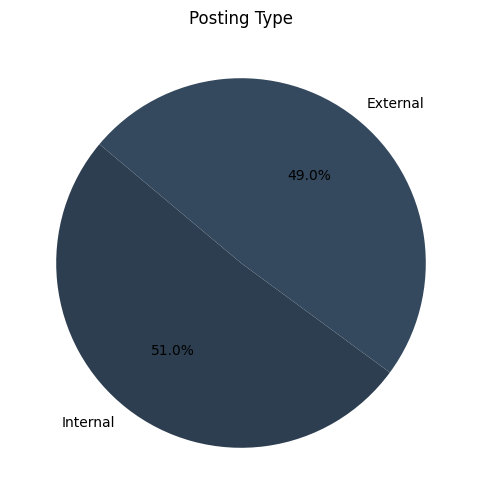

In [29]:
plt.figure(figsize=(8, 6))
df['Posting Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Posting Type')
plt.ylabel('')
plt.show()

- Types of Career Level

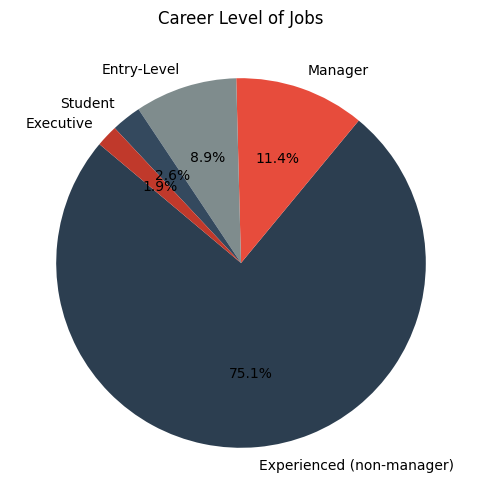

In [30]:
df['Career Level'].value_counts()

plt.figure(figsize=(8, 6))
df['Career Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=ordered_colors, startangle=140)
plt.title('Career Level of Jobs')
plt.ylabel('')
plt.show()

- Full-Time VS Part-Time indicator

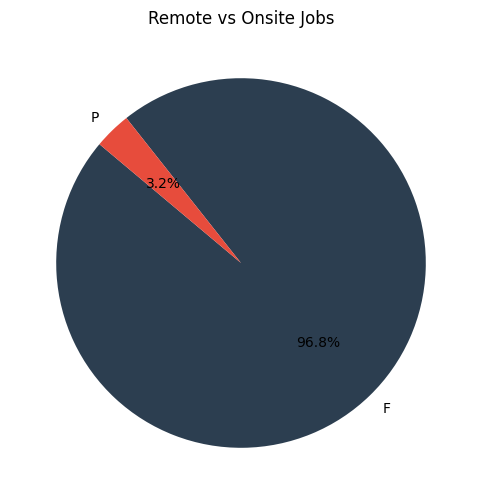

In [31]:
plt.figure(figsize=(8, 6))
df['Full-Time/Part-Time indicator'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=ordered_colors, startangle=140)
plt.title('Remote vs Onsite Jobs')
plt.ylabel('')
plt.show()

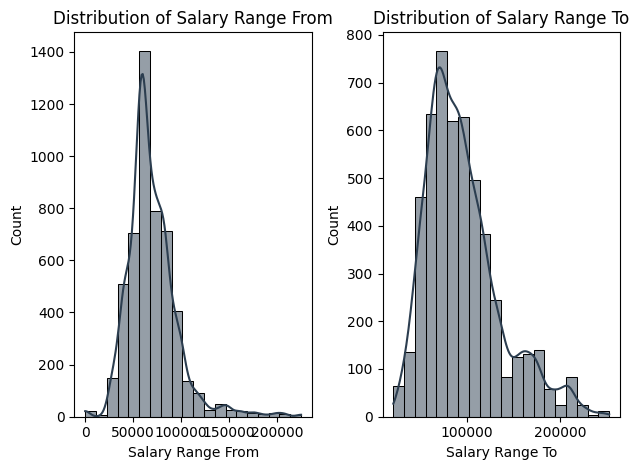

In [32]:
plt.subplot(1, 2, 1)
sns.histplot(df['Salary Range From'], bins=20, kde=True)
plt.title('Distribution of Salary Range From')

plt.subplot(1, 2, 2)
sns.histplot(df['Salary Range To'], bins=20, kde=True)
plt.title('Distribution of Salary Range To')


plt.tight_layout()
plt.show()

- Job Postings Over Time

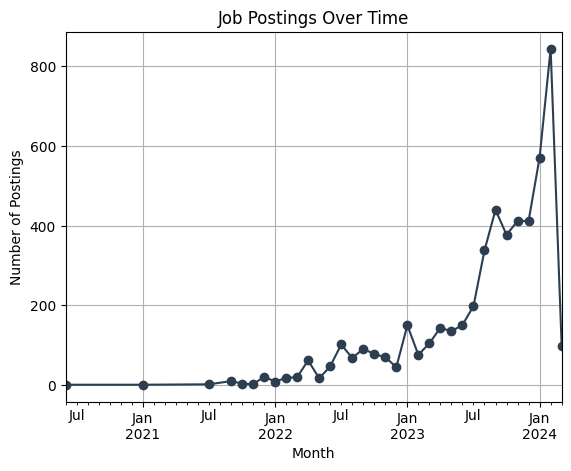

In [33]:
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df.groupby(df['Posting Date'].dt.to_period('M')).size().plot(kind='line', marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.grid()
plt.show()

- Top 10 Job Category

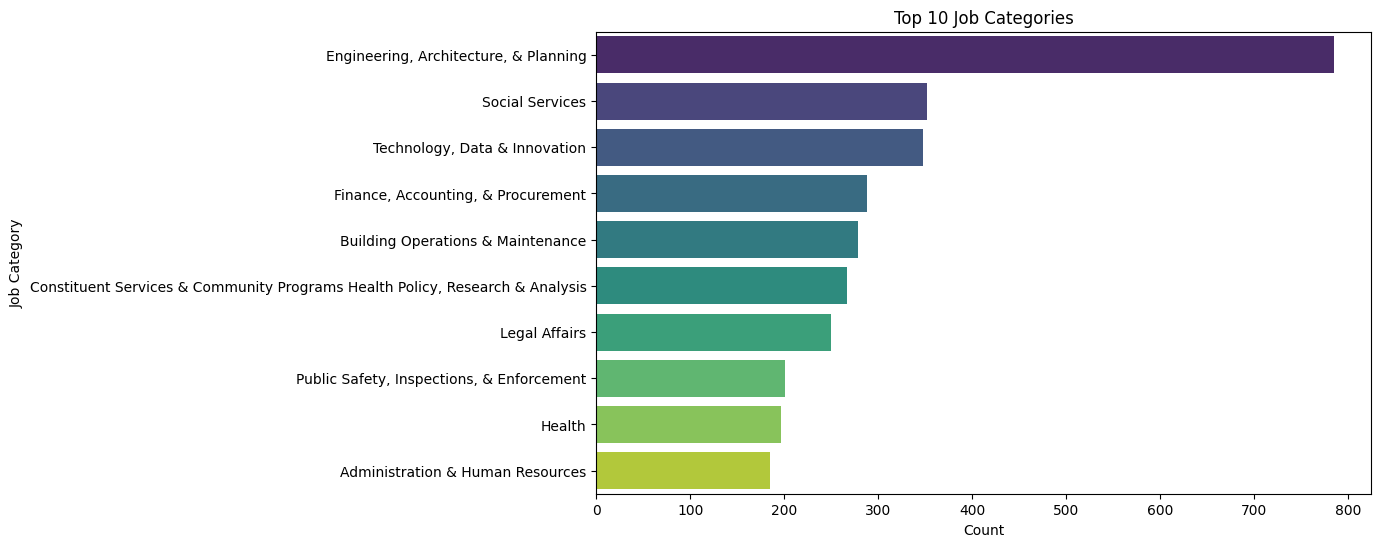

In [34]:
# Get the top 10 job categories
top_10_job_categories = df['Job Category'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_job_categories.values, y=top_10_job_categories.index, palette='viridis')
plt.title('Top 10 Job Categories')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()

In [35]:
df.isnull().sum()

Agency                             0
Posting Type                       0
# Of Positions                     0
Business Title                     0
Civil Service Title                0
Title Classification               0
Title Code No                      0
Level                              0
Job Category                       0
Full-Time/Part-Time indicator    117
Career Level                       0
Salary Range From                  0
Salary Range To                    0
Salary Frequency                   0
Work Location                      0
Division/Work Unit                 0
Minimum Qual Requirements         43
Preferred Skills                   0
Hours/Shift                        0
Residency Requirement              0
Posting Date                       0
Posting Updated                    0
Process Date                       0
dtype: int64

In [36]:
df.dropna(inplace=True)
data.to_csv('../Dataset/cleaned_data.csv', index=False)

In [37]:
df.isnull().sum()

Agency                           0
Posting Type                     0
# Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Classification             0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Minimum Qual Requirements        0
Preferred Skills                 0
Hours/Shift                      0
Residency Requirement            0
Posting Date                     0
Posting Updated                  0
Process Date                     0
dtype: int64

In [38]:
df.shape

(4960, 23)

In [39]:
df.columns
df.drop(['Posting Date','Posting Updated','Process Date'], axis = 1, inplace = True)

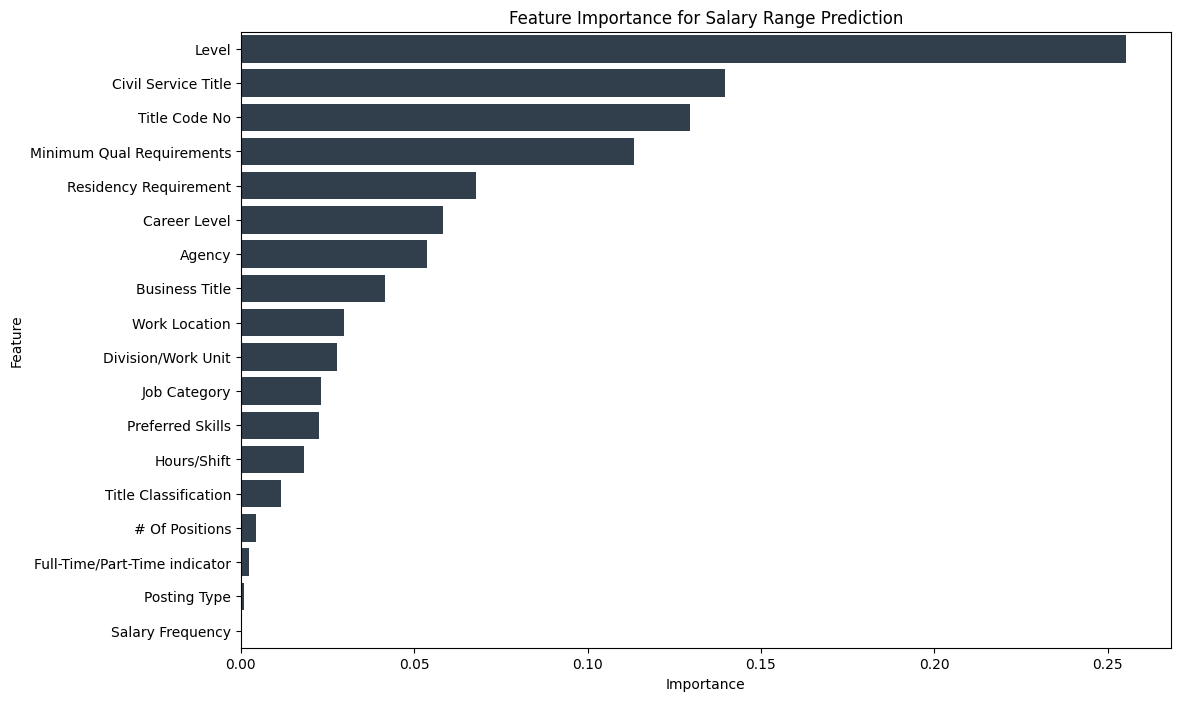

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define features and target
X = df.drop(columns=['Salary Range From', 'Salary Range To'])
y = df['Salary Range From']  # Assuming we are predicting the starting salary range

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Salary Range Prediction')
plt.show()

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.90
Mean Absolute Error: 3087.34
Mean Squared Error: 56864523.24


- Gradiant Bossting Regressor
- Adaboost Regressor
- XGboost Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Train a Gradient Boosting model
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the models using cross-validation
rf_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='r2')
ab_scores = cross_val_score(ab_model, X, y, cv=5, scoring='r2')
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')

print(f"Random Forest R-squared: {rf_scores.mean():.2f}")
print(f"Gradient Boosting R-squared: {gb_scores.mean():.2f}")
print(f"Ada Boosting R-squared: {ab_scores.mean():.2f}")
print(f"XGBoost R-squared: {xgb_scores.mean():.2f}")

Random Forest R-squared: 0.91
Gradient Boosting R-squared: 0.74
Ada Boosting R-squared: 0.10


- Lightgbm

In [44]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')
print(f"LightGBM R-squared: {lgb_scores.mean():.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1947
[LightGBM] [Info] Number of data points in the train set: 3968, number of used features: 17
[LightGBM] [Info] Start training from score 69486.964720
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1937
[LightGBM] [Info] Number of data points in the train set: 3968, number of used features: 17
[LightGBM] [Info] Start training from score 69740.954801
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Light

- Comparison between different models 

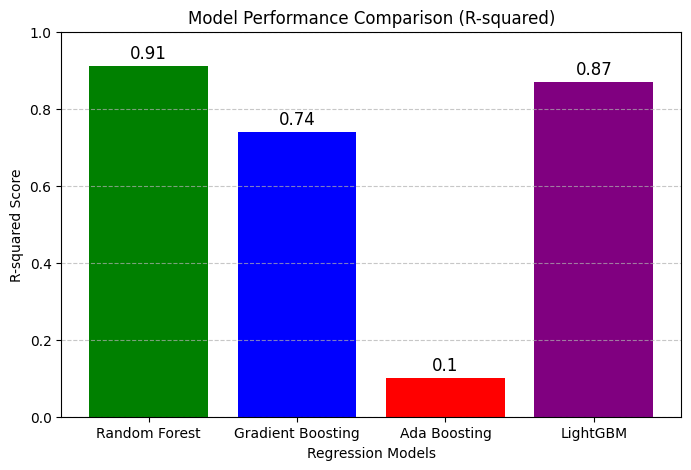

In [48]:

# Model names and corresponding R-squared values
models = ['Random Forest', 'Gradient Boosting', 'Ada Boosting', 'LightGBM']
r_squared_values = [0.91, 0.74, 0.10, 0.87]

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, r_squared_values, color=['green', 'blue', 'red', 'purple'])

# Add labels and title
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison (R-squared)')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of bars
for i, v in enumerate(r_squared_values):
    plt.text(i, v + 0.02, str(v), ha='center', fontsize=12)

# Show the plot
plt.show()
